# Creating a Highly Customisable Function to Plot the Mandelbrot Set and Investigate Bulb Periods

In [16]:
import numpy as np
from colored import fg
import matplotlib.pyplot as plt
import timeit

## 1. Introduction
### 1.1 What is the Mandelbrot Set?
The Mandelbrot set was discovered by mathematicians Adrien Douady and Benoit Mandelbrot. It is a collection of complex numbers generated through the use of an iterative formula, the edge of which forms an intricate and complex fractal when plotted.

Mathematically, it can be described as the "orbit of $Z_0$ under iteration of $x^2 + c$" [1]. We will look further at what this means in **2.1 Which Values Belong to the Mandelbrot Set?**.

The set has many fascinating properties such as:
- Containing highly symmetrical regions (see **2.3.1**)
- Containing the Fibonacci sequence (see **2.3**) [2]
- Being self similar; it contains tiny substructures that are the same shape as the overall structure

Since the Mandelbrot set contains fractals, depending on the complexity of these, it may have potential applications in encryption. The Mandelbrot set has fascinated mathematicians and physicists alike for decades, and technological advances have allowed regions of it to be explored in greater detail.

### 1.2 Complex Numbers
In the complex plane, numbers are shown with two perpendicular axes, representing the real and imaginary part of each value. The latter is denoted by the imaginary unit, *$i$*, where $i = \sqrt{-1}$.

Below we see how the complex number $z = 0.4 + 0.6i$ can be plotted; the real part of the number is on the $x$ axis, and the imaginary part is on the $y$ axis. A number with no imaginary part would lie along the line $y=0$. The line joining the point at $(0.4, 0.6)$ and the origin is equal to $|z|$. 

It is important to have a basic understand of complex numbers, as the Mandelbrot set is plotted in the complex plane.

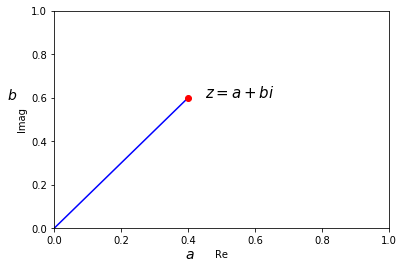

In [17]:
x = 0.4, 0
y = 0.6, 0

plt.plot(x, y, "b-")
plt.plot(x[0], y[0], "ro")

plt.text(x[0]+0.05, y[0], "$z = a+bi$", fontsize=15)
plt.text(x[0]-0.01, -0.14, "$a$", fontsize=14)
plt.text(-0.14, y[0]-0.01, "$b$", fontsize=14)

plt.axis([0, 1, 0, 1])
plt.xlabel("Re")
plt.ylabel("Imag")

plt.show()

## 2. Methods and Results
### 2.1 Which Values Belong to the Mandelbrot Set?
As discussed previously, an iterative sequence is used to determine the values that lie within the Mandelbrot set;

\begin{equation}
Z_{n+1} = {Z_n}^2 + c
\end{equation}

The Mandelbrot set is defined as the set of all $c$ for which there is a value $R$ such that $|Z_n|<R$ for all $n$. 

So in other words, for a value of $c$ to be in the set, the orbit must stay between a fixed range of $ \pm R$. Values of $c$ for which the orbit tends to infinity are not in the set [3].

The criterion that tells us whether a value, $c$, belongs to the Mandelbrot set is $|Z_n| \leq 2$.

The value of $Z_{0}$ and hence the starting point of the set, is 0. This is referred to as the 'seed'.

Different numbers of iterations can be used when finding if a value is in the set, which we can vary using the 'it' argument. Knowing the outcome of using different numbers of iterations will become very important later on, when we will be using an iteration-dependent colouring scheme to colour the data points when they are plotted. This is how the familiar, heatmap-style images, of the Mandelbrot set are produced.

We already know that $(0+0j)$ belongs to the Mandelbrot set. Now let's take a look at some values of $c$ and determine whether they belong to the set or not. For simplicity we will only be looking at values with $i=0$.

In [18]:
def mandelbrotprint(Re, Im, it):
    """
    Returns any complex value that 
    belongs to the Mandelbrot set and 
    prints a colour-coded statement.
    
    Keyword arguments:
    Re -- the real part
    Im -- the imaginary part
    it -- the number of iterations
    """
    c = complex(Re, Im)
    z = 0.0j # the starting value of the sequence is set as 0

    for i in range(it): # iter number of iterations are carried out to determine if the value belongs to the set
        z = z*z + c # the next value of the sequence is calculated
        if abs(z) == np.inf:
            break
   
    if abs(z) > 2: # exclusion criteria
        print(("{2}{0:.5f} does not belong to the Mandelbrot set with {1} iteration(s)".format(c, it, fg(1))))
    
    elif abs(z) <= 2: #inclusion criteria
        print(("{2}{0:.5f} belongs to the Mandelbrot set with {1} iteration(s).".format(c, it, fg(28)))) #coloured text is used to help the reader visualise the effect of changing iter. This took me 75 minutes. Please appreciate it.
        return c # returns value that lies in the set
    
    else:
        print("Error") #for debugging


N.B. The following break clause must be included:

`if abs(z) == np.inf:
    break`
            
This is important so that the sequence stops iterating once infinity is reached. This optimises the code for large sequences by stopping the `for` loop before the maximum number of iterations is reached when it is unnecessary for it to continue.

When the sequence tends to inifinity very quickly, the function will give `z = (inf+0j)` and then `z = (nan+nanj)` after two more iterations, where `nan` means "not a number".

We inlcude the break clause because there is not point continuing iterations after this point since no new values of $Z_n$ will be given, but more importantly because the code will not run correctly; when `abs(z)` is calculated for `z = (nan+nanj)`, the result is `nan` and therefore neither the inclusion criteria nor the exclusion criteria are satisfied and the function would not meet its purpose of determining whether the value $c$ belongs to the Mandelbrot set.

The error described has been shown below:

In [19]:
c = complex(8, 0)
z = 0.0j

for i in range(15):
    print(z)
    z = z*z + c # the next value of the sequence is calculated
    
if abs(z) > 2: # exclusion criteria
    print(("{2}{0:.5f} does not belong to the Mandelbrot set with {1} iteration(s)".format(c, iter, fg(1))))

elif abs(z) <= 2: # inclusion criteria
    print(("{2}{0:.5f} belongs to the Mandelbrot set with {1} iteration(s).".format(c, iter, fg(28)))) #coloured text is used to help the reader visualise the effect of changing iter. This took me 75 minutes. Please appreciate it.

else:
    print("\nError") # runs when neither inclusion nor exclusion criteria are met


0j
(8+0j)
(72+0j)
(5192+0j)
(26956872+0j)
(726672948024392+0j)
(5.280535733904607e+29+0j)
(2.788405763704347e+59+0j)
(7.775206703059622e+118+0j)
(6.045383927530328e+237+0j)
(inf+0j)
(inf+nanj)
(nan+nanj)
(nan+nanj)
(nan+nanj)

Error


In [20]:
for n in np.linspace(0.25, 1, 5):
    mandelbrotprint(n, 0, 100)

0.25000+0.00000j belongs to the Mandelbrot set with 100 iteration(s).
0.43750+0.00000j does not belong to the Mandelbrot set with 100 iteration(s)
0.62500+0.00000j does not belong to the Mandelbrot set with 100 iteration(s)
0.81250+0.00000j does not belong to the Mandelbrot set with 100 iteration(s)
1.00000+0.00000j does not belong to the Mandelbrot set with 100 iteration(s)


We can see below that for 5 evenly spaced values between 0.25 and 1 on the real axis, one belongs to the set and the rest do not.

Let's investigate some values that are at the positive, real, edge of the Mandelbrot set.

In [21]:
for n in np.linspace(0.25, 0.251, 5):
    mandelbrotprint(n, 0, 50) # 50 iterations

0.25000+0.00000j belongs to the Mandelbrot set with 50 iteration(s).
0.25025+0.00000j belongs to the Mandelbrot set with 50 iteration(s).
0.25050+0.00000j belongs to the Mandelbrot set with 50 iteration(s).
0.25075+0.00000j belongs to the Mandelbrot set with 50 iteration(s).
0.25100+0.00000j belongs to the Mandelbrot set with 50 iteration(s).


After 50 iterations, the inclusion criterion of $|Z_n| \leq 2$ has been reached by all of the values. So let's see what happens if we double the number of iterations to 100, then 200...

In [22]:
for n in np.linspace(0.25, 0.251, 5):
    mandelbrotprint(n, 0, 100) # 100 iterations

0.25000+0.00000j belongs to the Mandelbrot set with 100 iteration(s).
0.25025+0.00000j belongs to the Mandelbrot set with 100 iteration(s).
0.25050+0.00000j belongs to the Mandelbrot set with 100 iteration(s).
0.25075+0.00000j belongs to the Mandelbrot set with 100 iteration(s).
0.25100+0.00000j does not belong to the Mandelbrot set with 100 iteration(s)


In [23]:
for n in np.linspace(0.25, 0.251, 5):
    mandelbrotprint(n, 0, 200) # 200 iterations

0.25000+0.00000j belongs to the Mandelbrot set with 200 iteration(s).
0.25025+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25050+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25075+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25100+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)


We can see that for twice the original number of iterations, 80% of the values now belong to the set. For three times the original number of iterations, just 20% of the values belong to the set. Therefore the proportion of values belonging to the set decreases in a non-linear fashion with increasing iterations.

We will also investigate whether there is a relationship between the number of evenly spaced points in the same range and the number of iterations by doubling the number of points to 10 and then 20 for 200 iterations.

In [24]:
for n in np.linspace(0.25, 0.251, 10): # 10 points
    mandelbrotprint(n, 0, 200)

0.25000+0.00000j belongs to the Mandelbrot set with 200 iteration(s).
0.25011+0.00000j belongs to the Mandelbrot set with 200 iteration(s).
0.25022+0.00000j belongs to the Mandelbrot set with 200 iteration(s).
0.25033+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25044+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25056+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25067+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25078+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25089+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25100+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)


In [25]:
for n in np.linspace(0.25, 0.251, 20): # 20 points
    mandelbrotprint(n, 0, 200)

0.25000+0.00000j belongs to the Mandelbrot set with 200 iteration(s).
0.25005+0.00000j belongs to the Mandelbrot set with 200 iteration(s).
0.25011+0.00000j belongs to the Mandelbrot set with 200 iteration(s).
0.25016+0.00000j belongs to the Mandelbrot set with 200 iteration(s).
0.25021+0.00000j belongs to the Mandelbrot set with 200 iteration(s).
0.25026+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25032+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25037+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25042+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25047+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25053+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25058+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25063+0.00000j does not belong to the Mandelbrot set with 200 iteration(s)
0.25068+0.00000j does not belong t

We can see that doubling the points has increased the percentage of values in the set 1.5 times to 30%, and doubling the number of points again reduces the percentage belonging to the set to 25%. The fact that there seems to be no relationship here alludes to the intricate and non-linear nature of the edges of the Mandelbrot set. We will visualise these later on in **2.3 Plotting the Mandelbrot Set** and find that they are made up of very complex fractal patterns.

### 2.2 Is There an Optimal Number of Iterations?
From using our `mandelbrot_print()` function to investigate the effects of changing the number of points and the number of iterations, we found that the proportion of values belonging to the Mandelbrot set decreases non-linearly as the number of iterations is increased.

We can investigate this relationship further by collecting and plotting data for different numbers of iterations, to try and find out the nature of the relationship (e.g. quadratic, exponential) and to determine an approximate optimal number of iterations. This will be useful later on to use as a default argument when we create a Mandebrot plotting function. The advantage of using the optimal number of iterations is that we will be able to produce an accurate image of the Mandelbrot plot, within the bounds of the limited computing power available.

Firstly we need to alter the `mandelbrot_print()` function so that the print commands are not executed. Instead, we want it to just return values that are in the Mandelbrot set. Then we will make a customisable `iterationstudy()` function to plot the percentage of values belonging to the set against the number of iterations used.

For simplicity we are just going to study real numbers at the edges of the set, which gives us two areas of interest only – the real positive edge and the real negative edge.

In order to carry out this investigation, we need to define what is meant by the optimal number of iterations.

**Optimal iterations:** Number of iterations reached just before significant visual decrease in $\frac{dV}{dI}$, relative to $\frac{dV}{dI}$ for lower iterations.

In [26]:
def mandelbrot(Re, Im, iter):
    """
    Returns any complex value that 
    belongs to the Mandelbrot set.
    
    Keyword arguments:
    Re -- the real part
    Im -- the imaginary part
    iter -- the number of iterations
    """
    c = complex(Re, Im)
    z = 0.0j
    
    for i in range(iter):
        z = z*z + c
        if abs(z) == np.inf:
            break
    
    if abs(z) <= 2:
        return c # values belonging to the set are returned


In [27]:
def iterationstudy(remin, remax, re_n, itermin=50, itermax=2000, iter_n=80):
    """
    Produces graph of percentage of real values in a 
    range that belong to the Mandelbrot set against 
    number of iterations.
    
    Keyword arguments:
    remin -- real part minimum
    remax -- real part maximum
    re_n -- number of points in range remax-remin
    itermin -- minimum iterations
    itermax -- maximum iterations
    iter_n -- number of points in range itermax-itermin
    """
    setn = []
    belongset = []
    percentages = []

    iterationset = np.linspace(itermin, itermax, iter_n)
    
    for i in iterationset:
        for n in np.linspace(remin, remax, re_n):
            setn.append(mandelbrot(n, 0, int(i)))
            belongset = [j for j in setn if j is not None] # removes instances of 'None' in setn
        percentage = 100*len(belongset)/len(setn)
        percentages.append(percentage)

    plt.plot(iterationset, percentages) # plots percentage of values in set against iterations
    plt.xlabel("Iterations")
    plt.ylabel("Values belonging to the Mandelbrot set (%)")
    plt.title("Effect of changing number of iterations on % of {0} real numbers \n between {1} and {2} belonging to the Mandelbrot set".format(re_n, remin, remax) )
    plt.show()


Now we have defined the necessary functions, let's look at the trend for the real, positive edge of the set. Firstly we will look at three different ranges all centered around $x=0.2505$, with each range 10 times larger than the last.

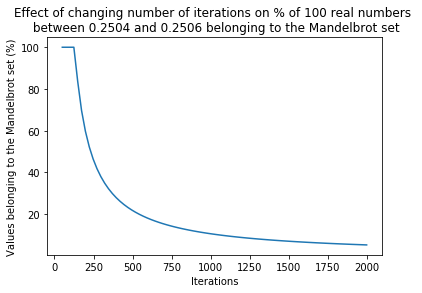

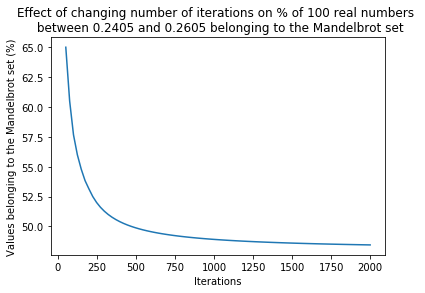

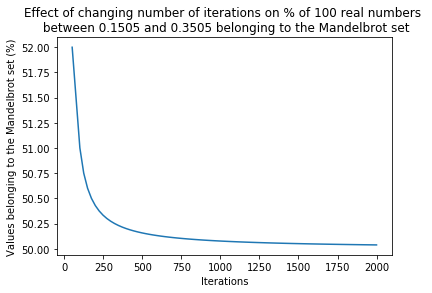

In [28]:
iterationstudy(0.2504, 0.2506, 100) #positive, real, range = 0.002
iterationstudy(0.2405, 0.2605, 100) #positive, real, range = 0.02
iterationstudy(0.1505, 0.3505, 100) #positive, real, range = 0.2

Now let's look at the effect of different numbers of points within the same range on the optimal number of iterations...

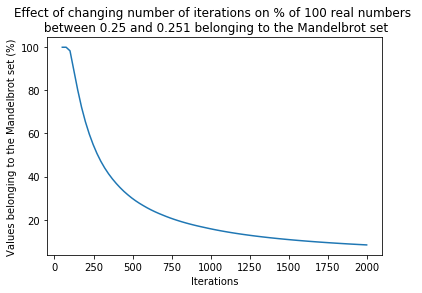

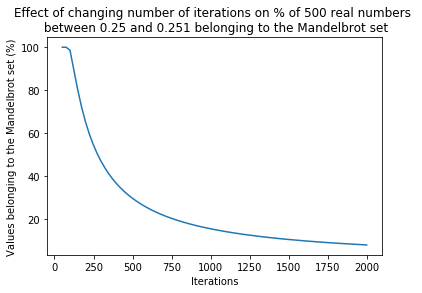

In [30]:
iterationstudy(0.25, 0.251, 100) #100 points
iterationstudy(0.25, 0.251, 500) #500 points

Finally let's look at the negative, real, edge of the Mandelbrot set.

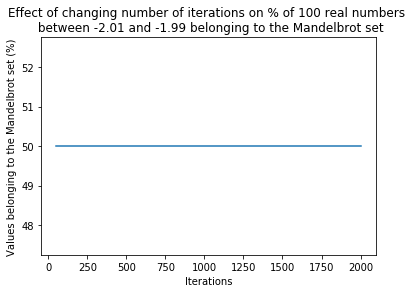

In [31]:
iterationstudy(-2.01, -1.99, 100) # range centered around 2

We can see that changing the number of iterations has no effect on the proportion of values in the set. We can see from the graph above that $x=-2$ is a sharp cut off point, approximating a straight line rather than anything more complex like we saw for the positive, real, edge of the set. We can take a closer look at this in **2.3 Plotting the Mandelbrot Set**.

From this short investigation, we can make some preliminary conclusions;
- Increasing the number of iterations will decrease the proportion of values belonging to the Mandelbrot set at the positive real edge (ranges centered around $x=0.2505$)
- Increasing the number of iterations will have no effect at the negative real edge. Any number of iterations has the same outcome.
- There is a clear optimal number of iterations for the positive real edge; significant change in $\frac{dV}{dI}$ occurs between 150-200, so the optimal number of iterations is approximately 100.
- After 1500 iterations, $f(I)$ for the positive real edge will tend towards an asymptote, so increasing the number of iterations beyond this would be unnecessary.
- The optimal number of iterations is not significantly different when the range of values is widened from 0.002 to 0.2
- The optimal number of iterations is the same when more points within the same range are used.

These conclusions are only valid for the values we have tested, and further investigation would determine whether they hold true for other parts of the Mandelbrot set where $i\neq0$. From the values we have investigated, we would expect that increasing the number of iterations would never increase the percentage of values belonging to the set. The `iterationstudy()` function would have to be optimised for speed and efficiency in order to be able to analyse a large enough number of 'edges' to have a chance of finding any range of points where our hypothesis does not hold true. Additionally it would have to be altered to work for complex values. Investigating this is beyond the scope of this report but would make for an interesting project!

### 2.3 Plotting the Mandelbrot Set

Now let's alter the `mandelbrot()` function to create a highly customisable `mandelbrot_plot()` function to automate plotting Mandelbrot sets. This time instead of returning values of $c$ that are in the set, we want to return the number of iterations required for the exclusion criteria to be reached if $c$ is not in the set, and the total number of iterations if $c$ is in the set. This is so that the points included in the set are plotted in one colour (default is white), and the others are assigned colours from the chosen gradient that is linearly dependent on how 'close' they were to being included, i.e. if a point meets the exclusion criteria at the last iteration, it was very near to being included. However if a point meets the exclusion criteria at the first iteration, it would be coloured with the opposite end of the gradient (default is black). The intermittent points are colour coded according to the gradient given by the chosen colormap [4].

One of the purposes of making a highly customisable function is to allow us to easily look at smaller sections of the mandelbrot set later on. To do this we will need to change the range of x and y values plotted, and may also need to change the resolution of the image so that details can be seen more clearly. We may also want to change the colormap. Hence, all of these criteria will be arguments in the `mandelbrot_plot()` function.

We will also use a 'points' argument, which will control the number of points plotted and therefore will control the quality of the image produced – using more points here is comparable to increasing the number of megapixels in a photograph. For higher resolutions, more points must be used to preserve the quality of the image. The default argument has been chosen such that it is the optimal number of points for the image produced when the function is called with the default parameters.

The default number of iterations has been chosen as 100, which was found to be the optimal number in **2.2 Is There an Optimal Number of Iterations?**.

In [32]:
def mandel(Re, Im, iter):
    """
    Determines if a complex value belongs to
    the Mandelbrot set. Returns total number 
    of iterations if it does. Returns number 
    of iterations required to meet exclusion
    criteria if it does not.
    
    Keyword arguments:
    Re -- real part
    Im -- imaginary part
    iter -- number of iterations
    """
    c = complex(Re, Im)
    z = 0.0j
    
    for i in range(iter):
        z = z*z + c
        if abs(z) > 2: #exclusion criteria
            return i # number of iterations is returned when c not in set
        
        elif abs(z) == np.inf:
            break
    
    return iter # iter is returned if c is in set


In [33]:
def mandelbrot_plot(xdim=(-2, 1), ydim=(-1, 1), points=100000, iter=100, res=100, col='hot'):
    """
    Plots any part of the Mandelbrot set.
    
    Keyword arguments:
    xdim -- tuple containing xmin and xmax
    ydim -- tuple containing ymin and ymax
    points -- number of points to plot
    iter -- number of iterations
    res -- DPI of image
    col -- colormap
    """
    columns = int(np.sqrt(points)) 
    rows = int(np.sqrt(points))
    
    (xmin, xmax) = xdim # upnacking tuple
    (ymin, ymax) = ydim # unpacking tuple

    it_array = np.zeros([rows, columns]) # array made with placeholder 0 values with dimensions of rows*columns
    for row_i, Re in enumerate(np.linspace(xmin, xmax, num=rows)): # loops over x (re) values 
        for column_i, Im in enumerate(np.linspace(ymin, ymax, num=columns)): # loops over y (imag) values
            it_array[row_i, column_i] = mandel(Re, Im, iter) # makes array of iterations from 0-iter: 0 = not in set, iter = in set. Each row of array corresponds to one y value.

    plt.figure(dpi=res) # dpi set to 'res' argument 
    plt.imshow(it_array.T, cmap = col, interpolation = 'bilinear', extent =[xmin, xmax, ymin, ymax], origin = 'lower') # plots 'value' array according to colormap
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.show()


Firstly let's take a look at what our function produces using the default arguments.

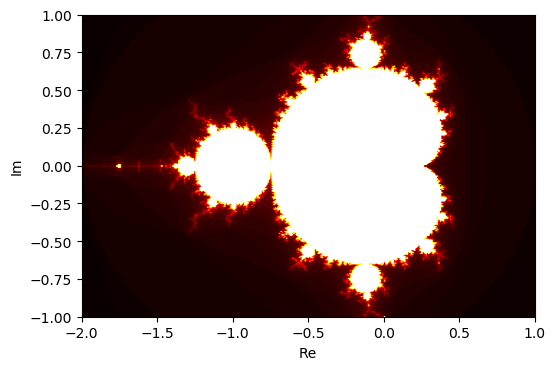

In [34]:
mandelbrot_plot()

That's a very clear image of the Mandelbrot set! It seems our default arguments have been chosen sensibly.
Now let's try out some different colormaps by changing the 'col' argument...

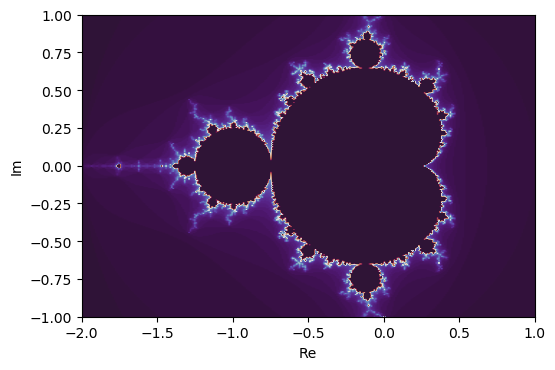

In [35]:
mandelbrot_plot(col='twilight_shifted')

The 'twilight_shifted' colormap is less suitable than the default argument because it has black at each end of the spectrum, meaning that points that are in the set and points that are not in the set are made the same colour. However it could be useful for looking at details in the edges of the set, since it shows these clearly, in bright colours.

Let's look at another different colormap, this time one that is a gradient with contrasting colours at either end.

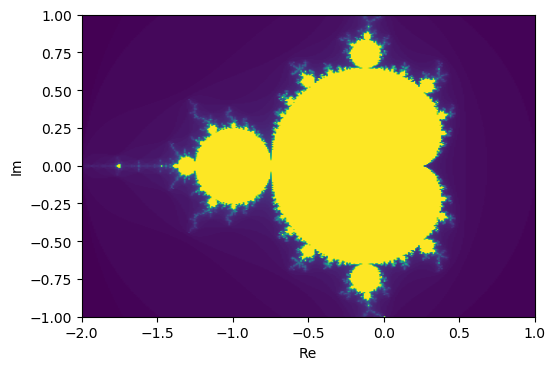

In [36]:
mandelbrot_plot(col='viridis')

The 'viridis' colormap certainly easy tell which points belong to the set, however the colours here are quite garish and unattractive. For now let's keep using our default argument for the colormap.

Now let's see what effect increasing the 'points' argument has. As previously mentioned, this is comparable to increasing the number of megapixels in a photo. We will multiply the default argument by 5 to give 500000 points.

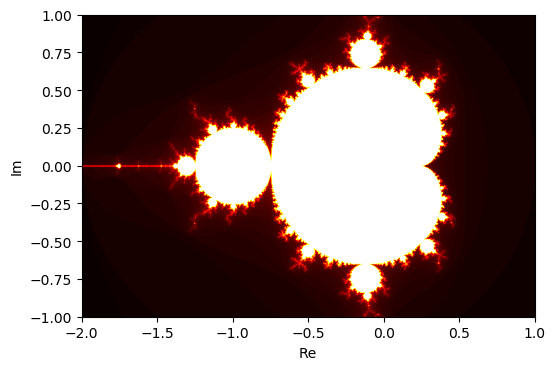

In [37]:
mandelbrot_plot(points = 500000)

The quality of the image has been improved by a negligible amount, for quite a substantial increase in the time taken for the function to run. Therefore the 'points' argument should only be changed when it is necessary to do so, for example when we have increased the DPI of the image using the 'res' argument.

Let's look more closely at the largest bulb at the top of the main cardioid. This is called a 'primary' bulb as it is directly attached to the main cardioid. We need to change the 'xdim', 'ydim', 'res', and 'points' arguments. We will increase 'res' slightly from the default value to produce a larger image so we can see fine details, and increase 'points' tenfold to 1,000,000. This value has been chosen because the portion of the image we are looking at is approximately 10 times smaller than the default.

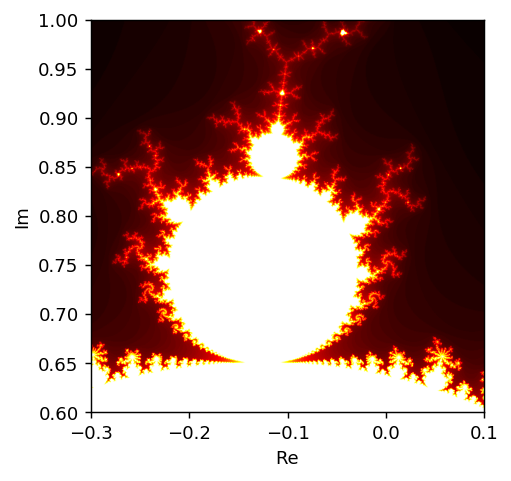

In [39]:
mandelbrot_plot((-0.3, 0.1), (0.6, 1), points = 1000000, res = 130)

The most noticeable feature here is the main antenna at the top of the image, which consists of three spokes. The number of spokes on the antenna corresponds to the period of the bulb [5], therefore this is a period 3 bulb.

The main cardioid is classed as a period 1 bulb, and the large bulb to its left is a period 2 bulb. We can see these from looking at the image of the entire Mandelbrot set. So, when we order the bulbs from largest to smallest and consider their periods, we have a sequence of numbers: 1, 2, 3. Not very exciting, right? Let's see what comes next. We need to find the period of the largest bulb between the last two bulbs in the sequence.

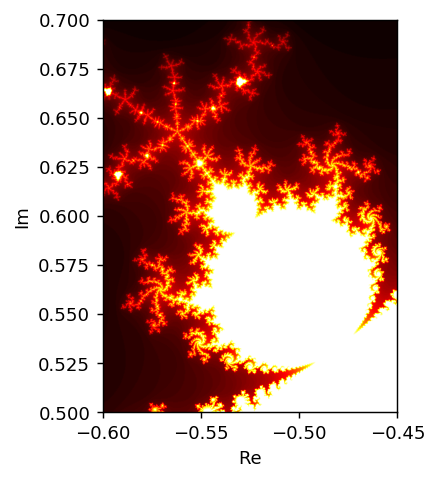

In [43]:
mandelbrot_plot((-0.6, -0.45), (0.5, 0.7), points = 1000000, res = 130)

From the plot above we can see that the bulb that comes next in the sequence has period 5. Let's look at the next bulb in the sequence - this is the largest bulb between the period 3 and period 5 bulbs.

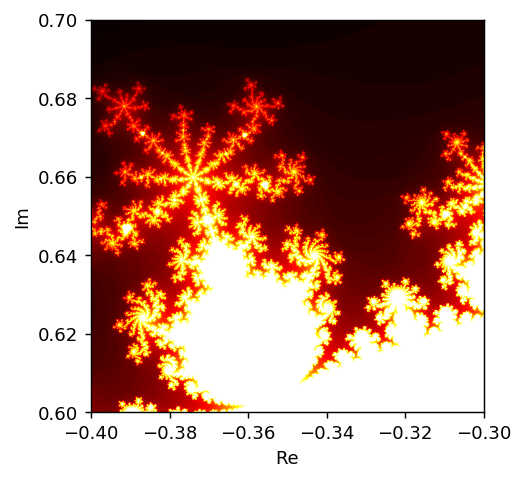

In [44]:
mandelbrot_plot((-0.4, -0.3), (0.6, 0.7), points = 1000000, res = 130)

Once again, by counting the number of spokes on the antenna, we can see that this is a period 8 bulb. So our sequence becomes
1, 2, 3, 5, 8. Recognise it? It's the Fibonacci sequence!

An interesting idea for further development here is to create a function that automatically finds the period of sequential bulbs and generates a sequence. This would allow us to determine whether the Fibonacci sequence continues indefinitely. To do this, the simplest route would be to find a mathematical method to determine the positions and periods of the bulbs, however it would be much more interesting to use image recognition and machine learning.

### 2.3.1 Interesting Imagery in the Mandelbrot Set
In **2.2 Is There an Optimal Number of Iterations?** we found that the left, real, edge of the Mandelbrot set has a very sharp cut off point, wherein increasing the number of iterations has no effect on the number of values belonging to the set. With the `mandelbrotplot()` function we are now able to see what this looks like.

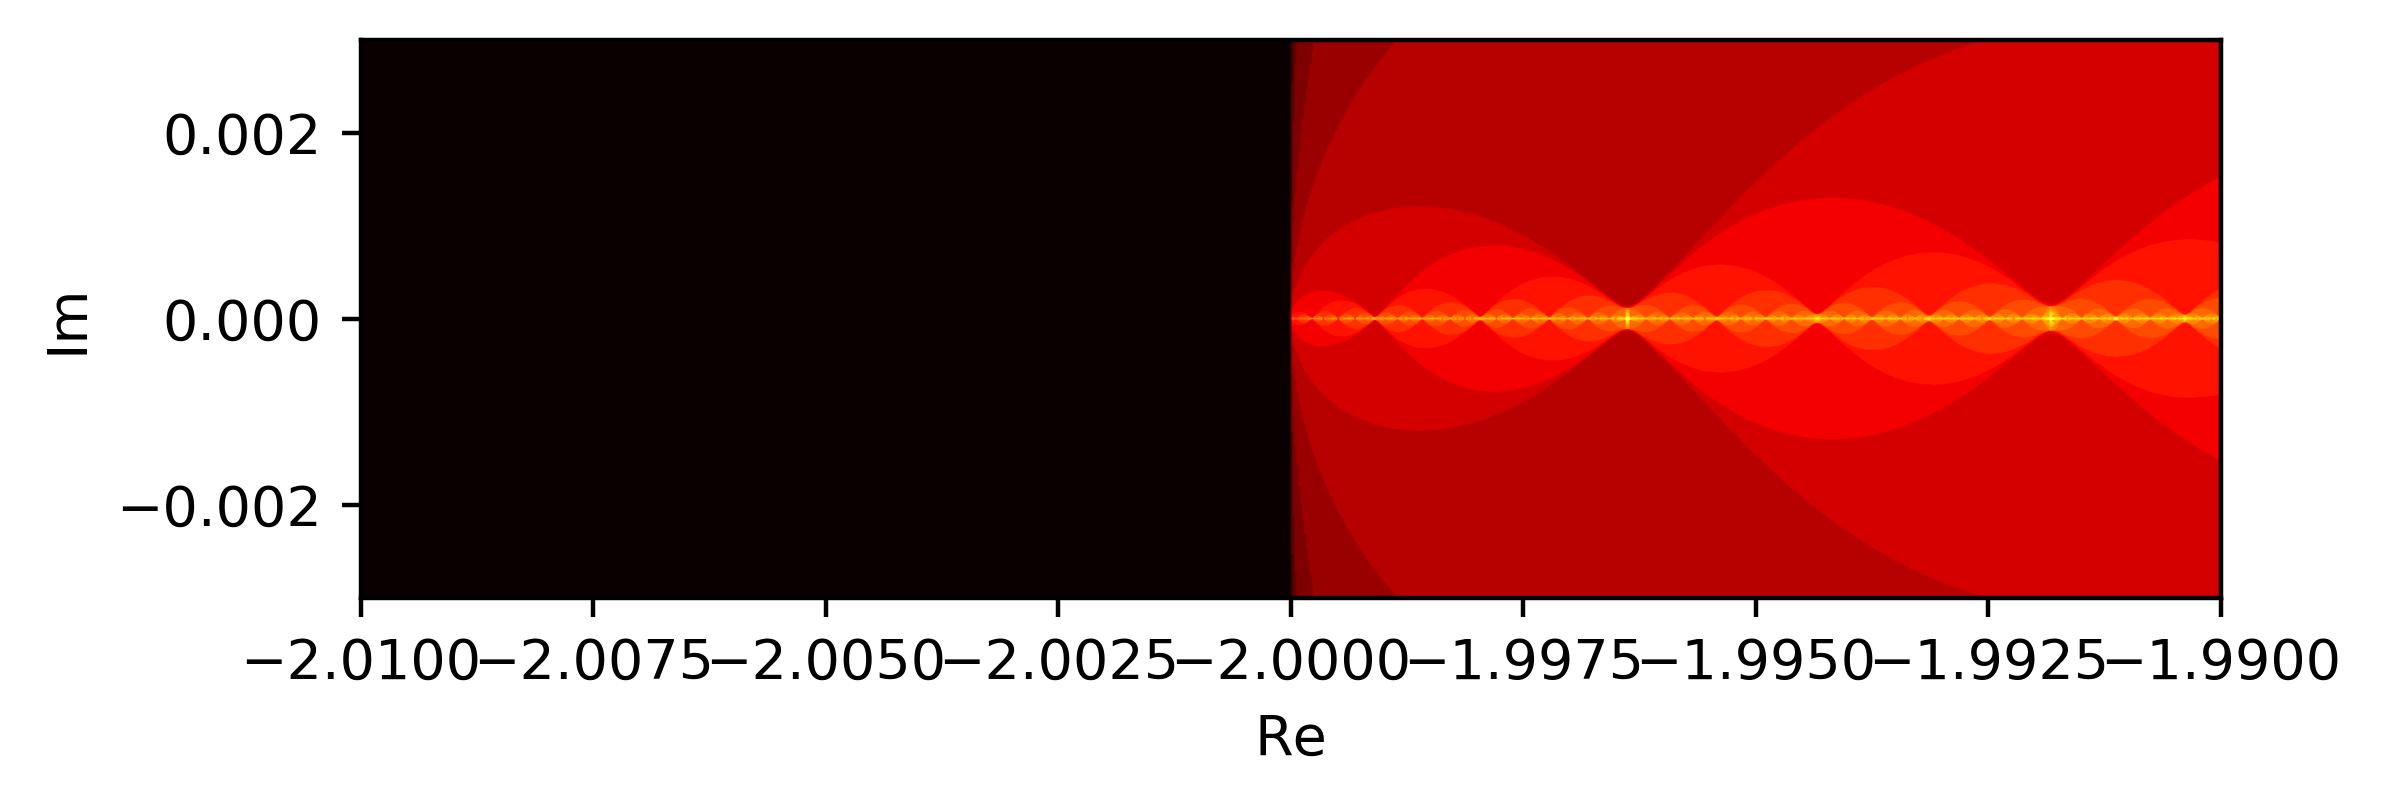

In [45]:
mandelbrot_plot((-2.01, -1.99), (-0.003, 0.003), points = 1000000, iter = 300, res = 400)

As found in **2.2**, there is indeed a sharp cut off at $x = -2$. We see that values beyond this point have been coloured black, meaning they do not belong to the Mandelbrot set after 100 iterations. In fact, it's not possible for them to belong to the Mandelbrot set with any number of iterations, because the set is centered on $(0,0)$ and confined to a circle of radius 2. 

This is evident from eq. (1) where we see that the inclusion criteria of $|Z| \leq 2$ cannot be met for $c = 2$ after just one iteration, since $Z_{1} = 0^2 + c = 2$.

We can see from the images below that this region of the Mandelbrot set is highly symmetrical and self-similar.

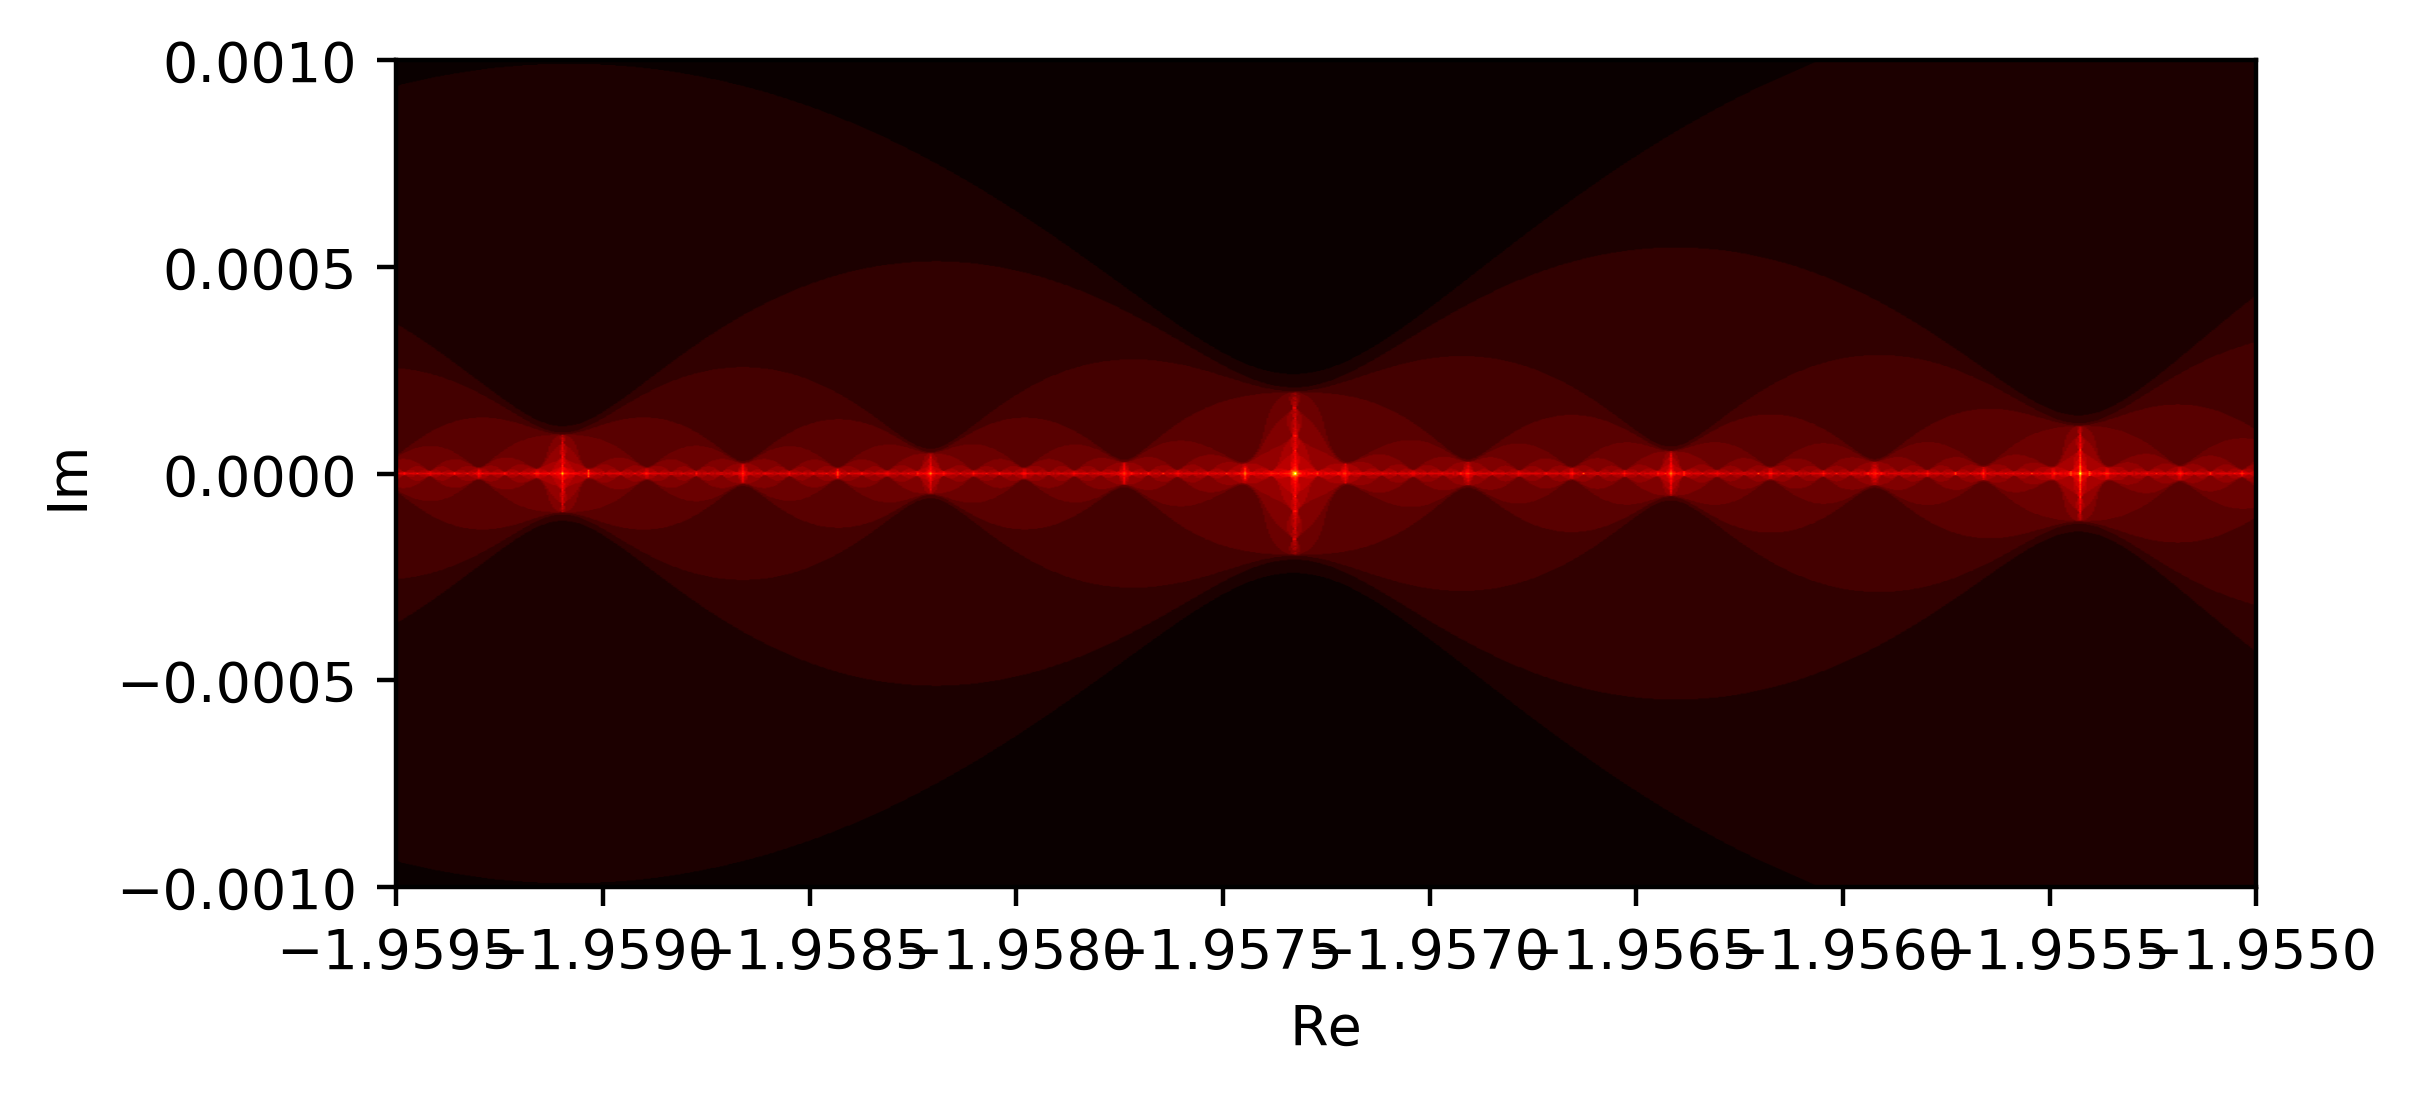

In [46]:
mandelbrot_plot((-1.9595, -1.9550), (-0.001, 0.001), points = 1000000, iter = 300, res = 400)

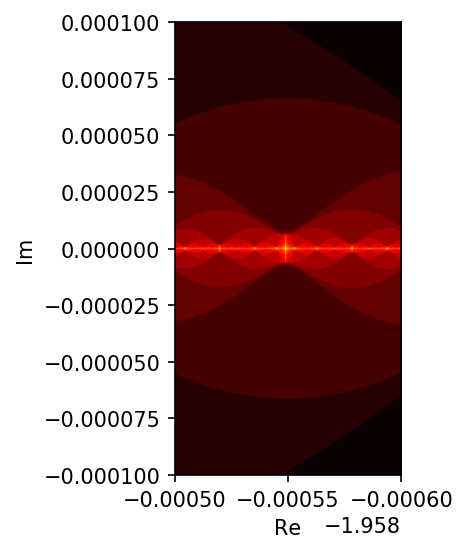

In [47]:
mandelbrot_plot((-1.9585, -1.9586), (-0.0001, 0.0001), points = 1000000, iter = 300, res = 150)

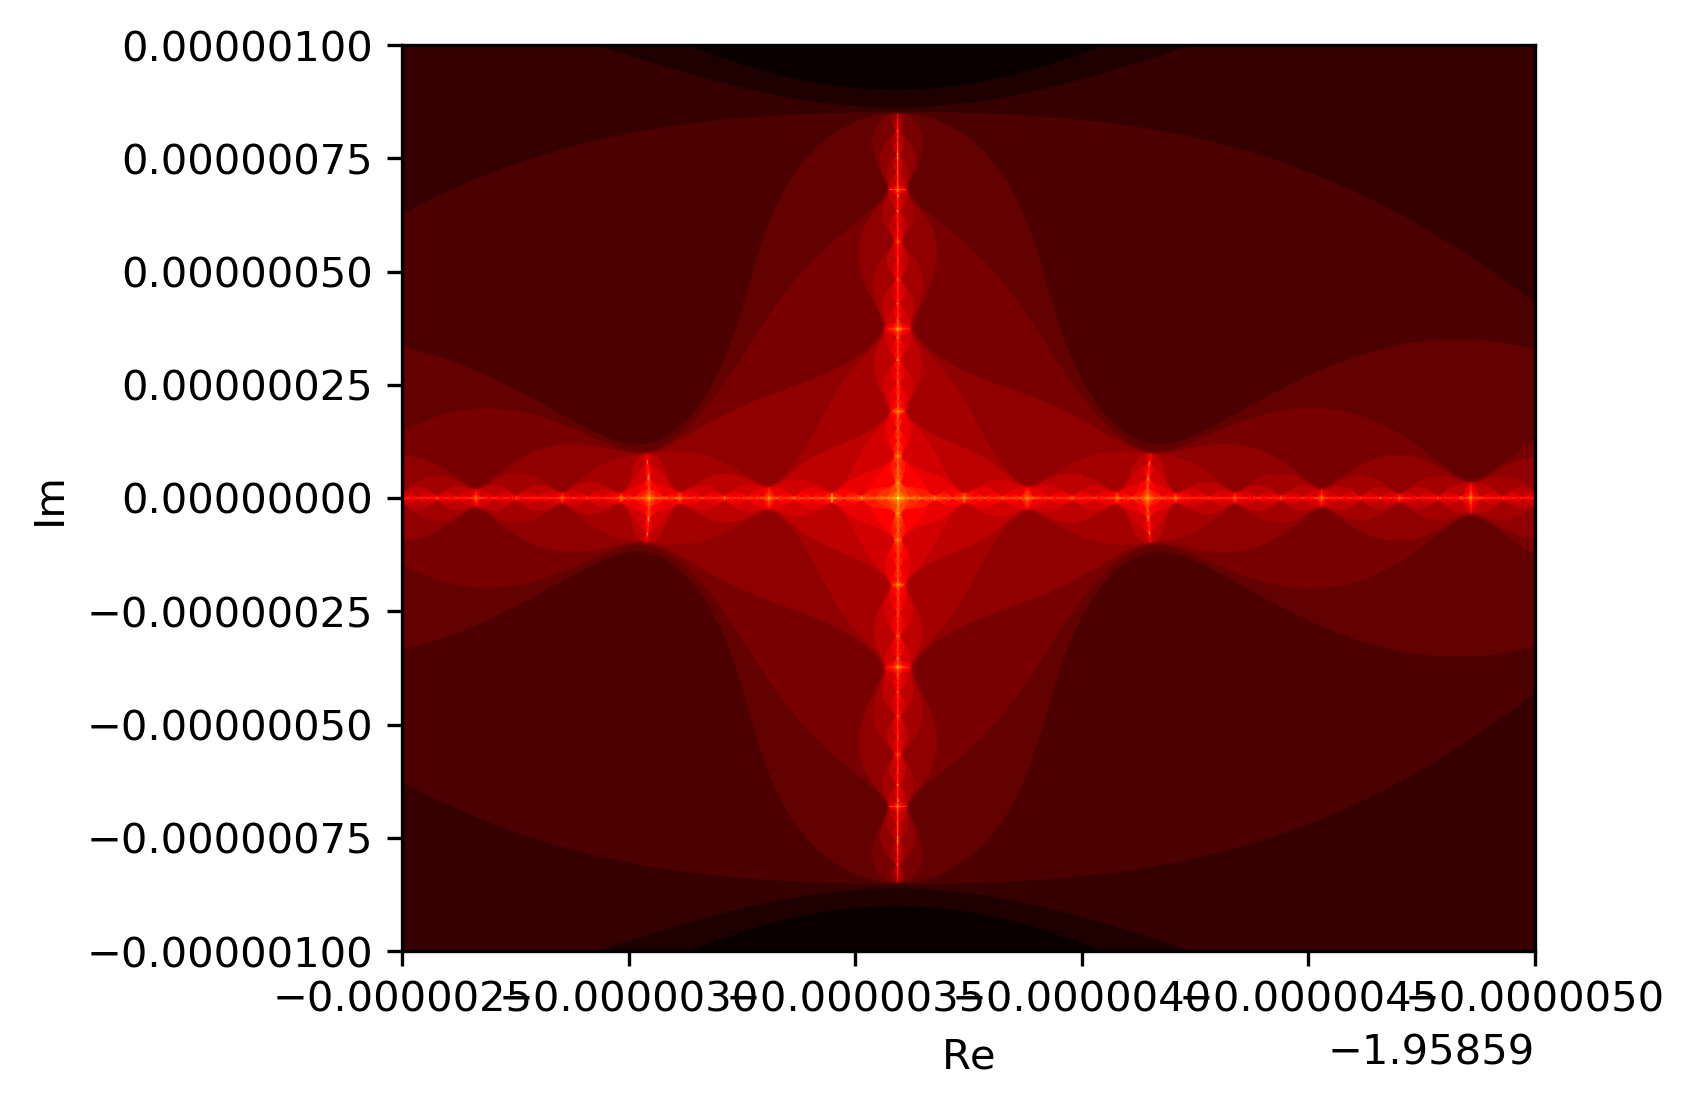

In [48]:
mandelbrot_plot((-1.9585925, -1.958595), (-0.000001, 0.000001), points = 1000000, iter = 300, res = 300)

Some more examples of areas of interest follow.

Below: Eight-fold symmetry in the edge of the set [6]

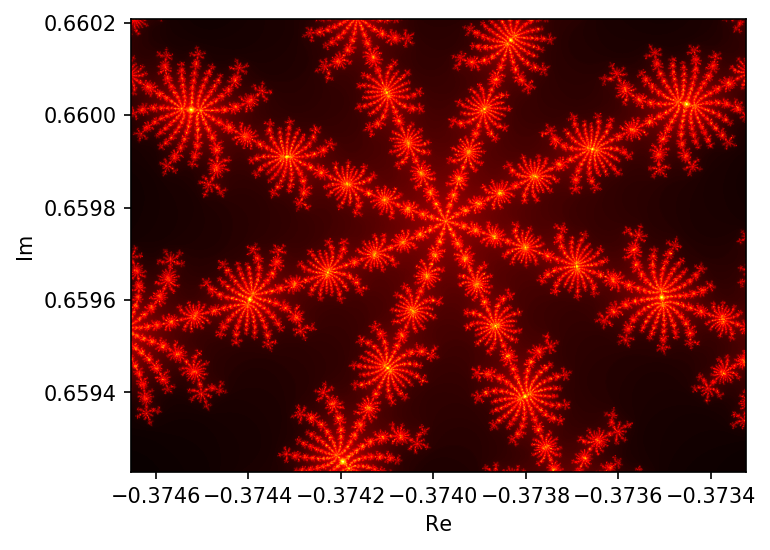

In [50]:
mandelbrot_plot((-0.37465401, -0.37332411), (0.659227668, 0.66020767), points = 1000000, iter = 300, res = 150)

Below: The 'elephant valley' [7]

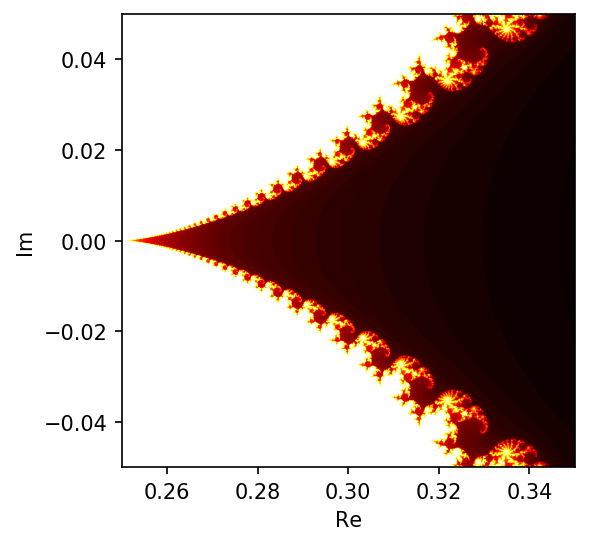

In [51]:
mandelbrot_plot((0.25, 0.35), (-0.05, 0.05), points = 1000000, res = 150)

## 3. Discussion
The first function used to investigate the Mandelbrot set was `mandelbrotprint()`. The purpose of this is to allow a non-technical user to visualise the effect of changing the number of iterations on the proportion of values belonging to the Mandelbrot set. This was successfully achieved through the use of colour and formatted print statements, however an improvement would be for it to also print the percentage of values belonging to the set. The print statements are an excellent tool at first for a non-technical user to visualise the percentage change, but when we look at the effect of increasing the number of points within the range we end up with a lot of print statements even though we're only really interested in finding the percentage of values in the set. This change could be implemented by adding arguments that allow the user to choose whether they want to print statements, percentages, or both.

The function is not limited in terms of input, since it can be used with positive, negative, real, and complex numbers. 
It is also quicker and more intuitive than the `iterationstudy()` function for finding whether a range of numbers contains values that are in the Mandelbrot set. The function can be used in this way to quickly find the boundaries of the Mandelbrot set, which was not an intended purpose but proved to be useful when finding the real edges of the set to study in **2.2**. Consequently the `mandelbrotprint()` function has actually surpassed its intended purposes, so we will conclude that it was very successful.

The next function used was `iterationstudy()`. Its purpose is to plot the relationship between the percentage of values in the Mandelbrot set and the number of iterations used, with the intention of finding an optimal number of iterations. This is a similar function to `mandelbrotprint()` in that it finds which values are in the Mandelbrot set within a certain range, but its advantage is that it allows the reader to see the graphical relationship between these variables. Unlike `mandelbrotprint`, the list of values is iterated over within the function, so the function can be called without the use of an additional 'for' loop.

The `iterationstudy()` function clearly and effectively shows how increasing the number of iterations used either decreases or has no effect on the percentage of values on the real edges belonging to the set through its output of a graph. Further study could involve altering the function so that it can also be used for complex values and looking at the behaviour of other edges, as has been described in detail in **2.2**.

The graphs produced using the function showed a clear optimal number of iterations of approximately 100. This value was used as a default argument in the `mandelbrotplot()` function, where it was shown to be of a sensible size. Therefore, the `iterationstudy()` function fulfilled its purpose effectively.

The final function used was `mandelbrotplot()`. The intention here was for a highly customisable function to be made that is able to plot a clear image of the Mandelbrot set that meets the user's specification. The important features for customisation were the number of iterations, number of points, colour of the plot, and DPI of the image. These parameters were set as arguments, all of which had default values. This meant the function could meet its most basic use, plotting the Mandelbrot set, by being called without any arguments being changed. The function was also able to meet its more complex of being highly customisable through use through use of different arguments.

The `mandelbrotplot()` function is the most complex function in the report, and hence it is not without its weaknesses. The most significant change that could be made would be optimising it for speed and efficiency, since plotting very small details within the set where more points have to be used can be time consuming. Additionally, each row and column of the array of iterations contains the same number of points, which is equal to the square root of the total input number of points. Improvements could be made here by scaling the number of points in each row and column with the x and y dimensions given in the arguments 'xdim' and 'ydim'. The lack of scaling didn't cause any visible problems when the function was called, but changing this would make the function more suitable for further use.
Finally, an improvement that is non-essential but would improve the automation of the function is to make the default number of points relative to the proportion of the default image being plotted, e.g. ten times more points are needed for a section ten times as small as the default.

The functions `mandelbrot()` and `mandel()` have both been used for very similar purposes, meaning some lines of code have been repeated, and the arguments 'Re' and 'Im' were also been used multiple times. Ideally, a single `mandelbrot()` function should have been written at the start of the document and called inside all three functions. This is a significant shortcoming of the project, and with more time this is the first improvement I would implement.

## 4. Conclusions

Important findings of the report are as follows;

**2.1 Which Values Belong to the Mandelbrot Set?**: Increasing the number of iterations decreases the percentage of values within a range that belong to the Mandelbrot set for the positive, real, edge. Changing number of points within a range has no definable relationship to the percentage of values belonging to the set for the limited ranges investigated. Further investigation would use a function similar to `iterationstudy()` to plot this relationship for different ranges at the edge of the set.

**2.2 Is There an Optimal Number of Iterations?**: The more iterations used, the more accurate an image of the Mandelbrot set can be achieved. The optimum number of iterations is 100, and increasing the number of iterations above 1500 has little effect. These conclusions may only hold true for the limited number of situations tested, but when using the `mandelbrot_plot` function, it was evident that 100 iterations was a sensible amount. A more accurate value could be obtained by finding the optimal number of iterations qualitatively, looking at the rate of change of the gradient, rather than by eye. Further study is needed to determine whether the optimal number of iterations changes based on factors such as range and number of points.

**2.3 Plotting the Mandelbrot Set**
The Fibonacci sequence has been shown to exist within the Mandelbrot set, up to the fifth term. This was achieved by calling the `mandelbrotplot()` function with parameters correspdonding to the positions of the bulbs, as determined by eye. The period of each bulb was then found by counting the number of spokes on the primary antenna. The manual method used to find bulbs and their periods is laborious, and various methods could be used to automate this process and find higher terms of the set, as has been discussed in detail in **2.3**.

The overall aims of the project were to create a highly customisable function to plot the Mandelbrot set, and to investigate bulb periods. Both of these have been achieved successfully, with a suitable degree of detail relative to the length of the project (40 hours). Possible improvements have been highlighted throughout the report, and various methods of implementing them have been discussed.

## 5. References
1. Devaney, R. (2006). Unveiling the Mandelbrot set. [online] plus.maths.org. Available at: https://plus.maths.org/content/unveiling-mandelbrot-set [Accessed 15 Feb. 2019].


2. Devaney, R. (2013). The Fibonacci Sequence. [online] Math.bu.edu. Available at: http://math.bu.edu/DYSYS/FRACGEOM2/node7.html [Accessed 1 Feb. 2019].


3. RContinuum1 (2012). Mandelbrot Set and Complex Numbers. 26:00. [online video] Available at: https://www.youtube.com/watch?v=c1WSjTkZZjE [Accessed 2 Feb. 2019].


4. Hunter, J., Dale, D., Firing, E. and Droettboom, M. (2017). Choosing Colormaps. [online] Matplotlib. Available at: https://matplotlib.org/users/colormaps.html [Accessed 9 Feb. 2019].


5. Devaney, R. (2013). Periods of the Bulbs. [online] Math.bu.edu. Available at: http://math.bu.edu/DYSYS/FRACGEOM/node3.html#SECTION00030000000000000000 [Accessed 1 Feb. 2019].


6. Köller, J. (n.d.). Mandelbrot Set. [online] Mathematische Basteleien. Available at: http://www.mathematische-basteleien.de/mandel_set.htm [Accessed 16 Feb. 2019].


7. Weisstein, E. (n.d.). Elephant Valley -- from Wolfram MathWorld. [online] MathWorld. Available at: http://mathworld.wolfram.com/ElephantValley.html [Accessed 16 Feb. 2019].

## 6. Bibliography

Avalos-Bock, S. (2009). Fractal Geometry: The Mandelbrot and Julia Sets. [ebook] Available at: http://www.math.uchicago.edu/~may/VIGRE/VIGRE2009/REUPapers/Avalos-Bock.pdf [Accessed 15 Feb. 2019].

Fonseca, R. (2018). The Mandelbrot set. [online] Renatofonseca. Available at: http://renatofonseca.net/mandelbrotset.php [Accessed 12 Feb. 2019].

Francis, D. (n.d.). Ask A Nerd: The Mandelbrot Set. [online] David Francis Website. Available at: https://www.bowdoin.edu/~dfrancis/askanerd/mandelbrot/ [Accessed 4 Feb. 2019].

Goodger, D. (2001). PEP 257 -- Docstring Conventions. [online] Python. Available at: https://www.python.org/dev/peps/pep-0257/ [Accessed 16 Feb. 2019].

Hunter, J., Dale, D., Firing, E. and Droettboom, M. (2012). Interpolations for imshow/matshow. [online] Matplotlib. Available at: https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html [Accessed 8 Feb. 2019].

Köller, J. (2000). Mandelbrot Set. [online] Mathematische Basteleien. Available at: http://www.mathematische-basteleien.de/mandel_set.htm [Accessed 6 Feb. 2019].

Matplotlib. (2017). showcase example code: mandelbrot.py. [online] Available at: https://matplotlib.org/examples/showcase/mandelbrot.html [Accessed 2 Feb. 2019].

Puget, J. (2015). How To Quickly Compute The Mandelbrot Set In Python. [online] IBM. Available at: https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en [Accessed 9 Feb. 2019].

RContinuum1 (2012). Mandelbrot Set and Complex Numbers. [online video] Available at: https://www.youtube.com/watch?v=c1WSjTkZZjE [Accessed 2 Feb. 2019].


**Special Mention:**

http://www.ventrella.com/Tweaks/Portraits/EvolvingMandelbrot.pdf

Over the hours I spent reading about the Mandelbrot set, this was the most bizarre paper I encountered. It is arguably pointless, and doesn't even produce aesthetically pleasing images. Worth a read.